## Heart disease

Resting blood pressure, cholesterol level, maximum heart rate, and chest pain type correlation with heart disease appearence.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

%config InlineBackend['figure_format'] = "retina"

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
numeric = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [4]:
sep_target = df.groupby(["target"])
print('-' * 70)
for c in numeric:
    print(c)
    print(sep_target[c].describe())
    print('-' * 70)

----------------------------------------------------------------------
age
        count       mean       std   min   25%   50%   75%   max
target                                                          
0       499.0  56.569138  7.908153  35.0  52.0  58.0  62.0  77.0
1       526.0  52.408745  9.631804  29.0  44.0  52.0  59.0  76.0
----------------------------------------------------------------------
trestbps
        count        mean        std    min    25%    50%    75%    max
target                                                                 
0       499.0  134.106212  18.576736  100.0  120.0  130.0  144.0  200.0
1       526.0  129.245247  16.112188   94.0  120.0  130.0  140.0  180.0
----------------------------------------------------------------------
chol
        count        mean        std    min    25%    50%     75%    max
target                                                                  
0       499.0  251.292585  49.558924  131.0  217.0  249.0  284.00  409.0
1 

In [5]:
categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

In [6]:
df.groupby("target")[categorical].apply(lambda a: a[:])

sex  cp  fbs  restecg  exang  slope  ca  thal
target                                                    
0      0       1   0    0        1      0      2   2     3
       1       1   0    1        0      1      0   0     3
       2       1   0    0        1      1      0   0     3
       3       1   0    0        1      0      2   1     3
       4       0   0    1        1      0      1   3     2
...          ...  ..  ...      ...    ...    ...  ..   ...
1      1011    1   1    0        0      0      2   0     2
       1014    0   2    0        1      0      1   0     2
       1019    1   0    0        1      0      2   0     2
       1020    1   1    0        1      1      2   0     2
       1023    0   0    0        0      0      2   0     2

[1025 rows x 8 columns]

In [7]:
cat_df = df.groupby("target")
print('-' * 30)
for c in categorical:
    print(c)
    print(cat_df[c].value_counts())
    print('-' * 30)

------------------------------
sex
target  sex
0       1      413
        0       86
1       1      300
        0      226
Name: sex, dtype: int64
------------------------------
cp
target  cp
0       0     375
        2      65
        1      33
        3      26
1       2     219
        1     134
        0     122
        3      51
Name: cp, dtype: int64
------------------------------
fbs
target  fbs
0       0      417
        1       82
1       0      455
        1       71
Name: fbs, dtype: int64
------------------------------
restecg
target  restecg
0       0          283
        1          204
        2           12
1       1          309
        0          214
        2            3
Name: restecg, dtype: int64
------------------------------
exang
target  exang
0       1        274
        0        225
1       0        455
        1         71
Name: exang, dtype: int64
------------------------------
slope
target  slope
0       1        324
        2        129
        0         4

In [8]:
df.groupby(["target"]).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [9]:
subdf = df[["trestbps", "chol", "thalach", "cp", "target"]]
subdf.drop("target", axis=1).describe()

,trestbps,chol,thalach,cp
count,1025.000000,1025.00000,1025.000000,1025.000000
mean,131.611707,246.00000,149.114146,0.942439
std,17.516718,51.59251,23.005724,1.029641
min,94.000000,126.00000,71.000000,0.000000
25%,120.000000,211.00000,132.000000,0.000000
50%,130.000000,240.00000,152.000000,1.000000
75%,140.000000,275.00000,166.000000,2.000000
max,200.000000,564.00000,202.000000,3.000000


In [10]:
subdf.cov()

,trestbps,chol,thalach,cp,target
trestbps,306.835410,115.657227,-15.822822,0.688565,-1.215584
chol,115.657227,2661.787109,-25.841797,-4.336914,-2.579102
thalach,-15.822822,-25.841797,529.263325,7.268296,4.865194
cp,0.688565,-4.336914,7.268296,1.060160,0.223903
target,-1.215584,-2.579102,4.865194,0.223903,0.250071


In [11]:
subdf.corr()

,trestbps,chol,thalach,cp,target
trestbps,1.000000,0.127977,-0.039264,0.038177,-0.138772
chol,0.127977,1.000000,-0.021772,-0.081641,-0.099966
thalach,-0.039264,-0.021772,1.000000,0.306839,0.422895
cp,0.038177,-0.081641,0.306839,1.000000,0.434854
target,-0.138772,-0.099966,0.422895,0.434854,1.000000


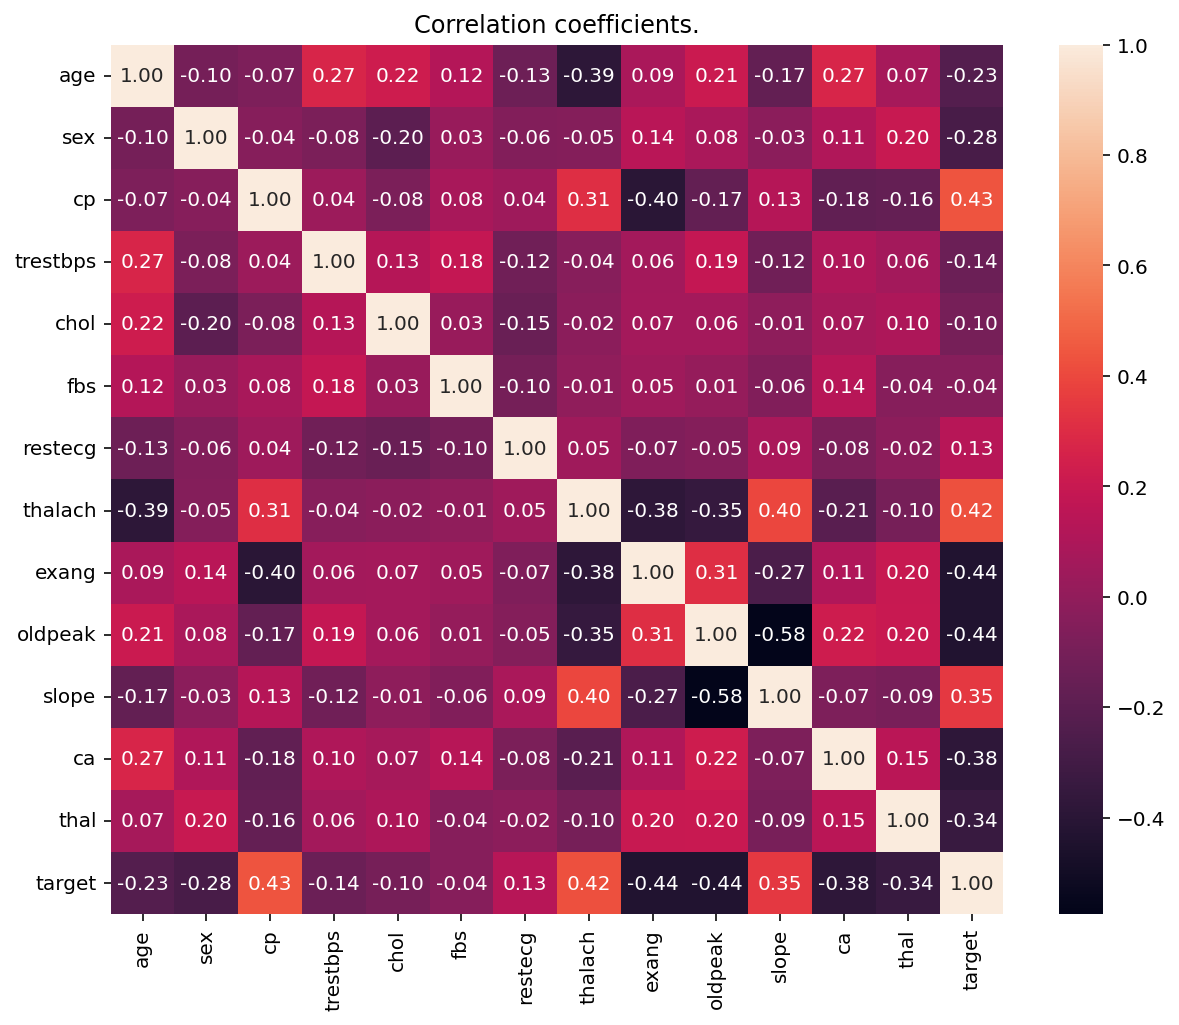

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f");
ax.set(title="Correlation coefficients.");
# fig.savefig(fname=f"visualizations/{c}.png",
#             dpi=300,
#             bbox_inches="tight",
#             pad_inches=0.2,
#             format='png'
#             )

In [13]:
variables = {
    "thalach": "Maximum heart rate achieved",
    "chol": "Cholesterol level",
    "trestbps": "Resting blood pressure",
    "cp": "Chest pain type"
}

numeric_variables = {
    "thalach": "Maximum heart rate achieved, beats/minute",
    "chol": "Cholesterol level, mg/dl",
    "trestbps": "Resting blood pressure, mm Hg",
}

categorical_variables = {
    "cp": {"description": "Chest pain type",
           "values": ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]}
}

In [14]:
def plot_linear(df, variable1, variable2, split_target=False, test_size=0.2):
    np.random.seed(4)
    target = df["target"]
    xx = np.c_[df[variable1], df[variable2]]
    x1 = xx[:,0].reshape(-1,1)
    x2 = xx[:,1].reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size=test_size)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_hat = lr.predict(X_test)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(X_test, y_hat, c='crimson', label="linear regression")
    ax.scatter(X_test, y_test, s=20, c="yellow", edgecolors="black", label="true points")
    ax.grid(visible=True, alpha=0.2, linestyle="--")
    mse = np.sum((y_test - y_hat)**2)/len(df[variable1])
    
    ax.set(title=f"""Linear dependence, '{variable1}' vs. '{variable2}', MSE={mse:.2f} (independent variable: '{variable1}')""",
           xlabel=variable1,
           ylabel=variable2)
    
    ax.legend();
    
#     fig.savefig(fname=f"visualizations/{variable1}-vs-{variable2}.png",
#             dpi=300,
#             bbox_inches="tight",
#             pad_inches=0.2,
#             format='png'
#             )

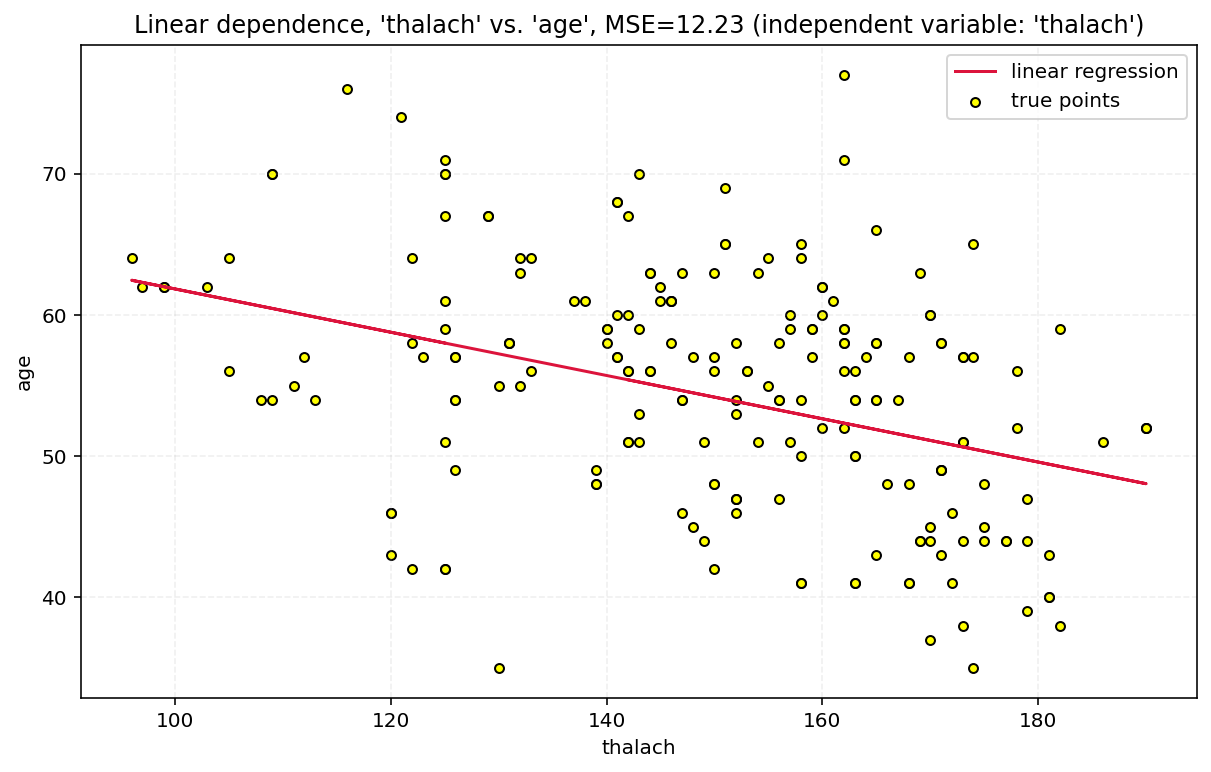

In [15]:
plot_linear(df, "thalach", "age")

In [16]:
def plot_linear_two(df, common_variable, variables: list, test_size=0.2):
    fig, axs = plt.subplots(figsize=(16,6), nrows=1, ncols=len(variables))
    name = ""
    
    for i, variable in enumerate(variables):
        np.random.seed(4)
        target = df["target"]
        xx = np.c_[df[common_variable], df[variable]]
        x1 = xx[:,0].reshape(-1,1)
        x2 = xx[:,1].reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size=test_size)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_hat = lr.predict(X_test)
        axs[i].plot(X_test, y_hat, c='crimson', label="linear regression")
        axs[i].scatter(X_test, y_test, s=20, c="yellow", edgecolors="black", label="true points")
        axs[i].grid(visible=True, alpha=0.2, linestyle="--")
        mse = np.sum((y_test - y_hat)**2)/len(df[variable])

        axs[i].set(title=f"{common_variable} vs. {variable}, MSE={mse:.2f}",
               xlabel=common_variable,
               ylabel=variable)

        axs[i].legend();
        fig.suptitle(f"Linear correlation, independent variable: {common_variable}")
        name += f"-{variable}"
        
    fig.savefig(fname=f"visualizations/{common_variable}-vs{name}.png",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.2,
        format='png'
        )

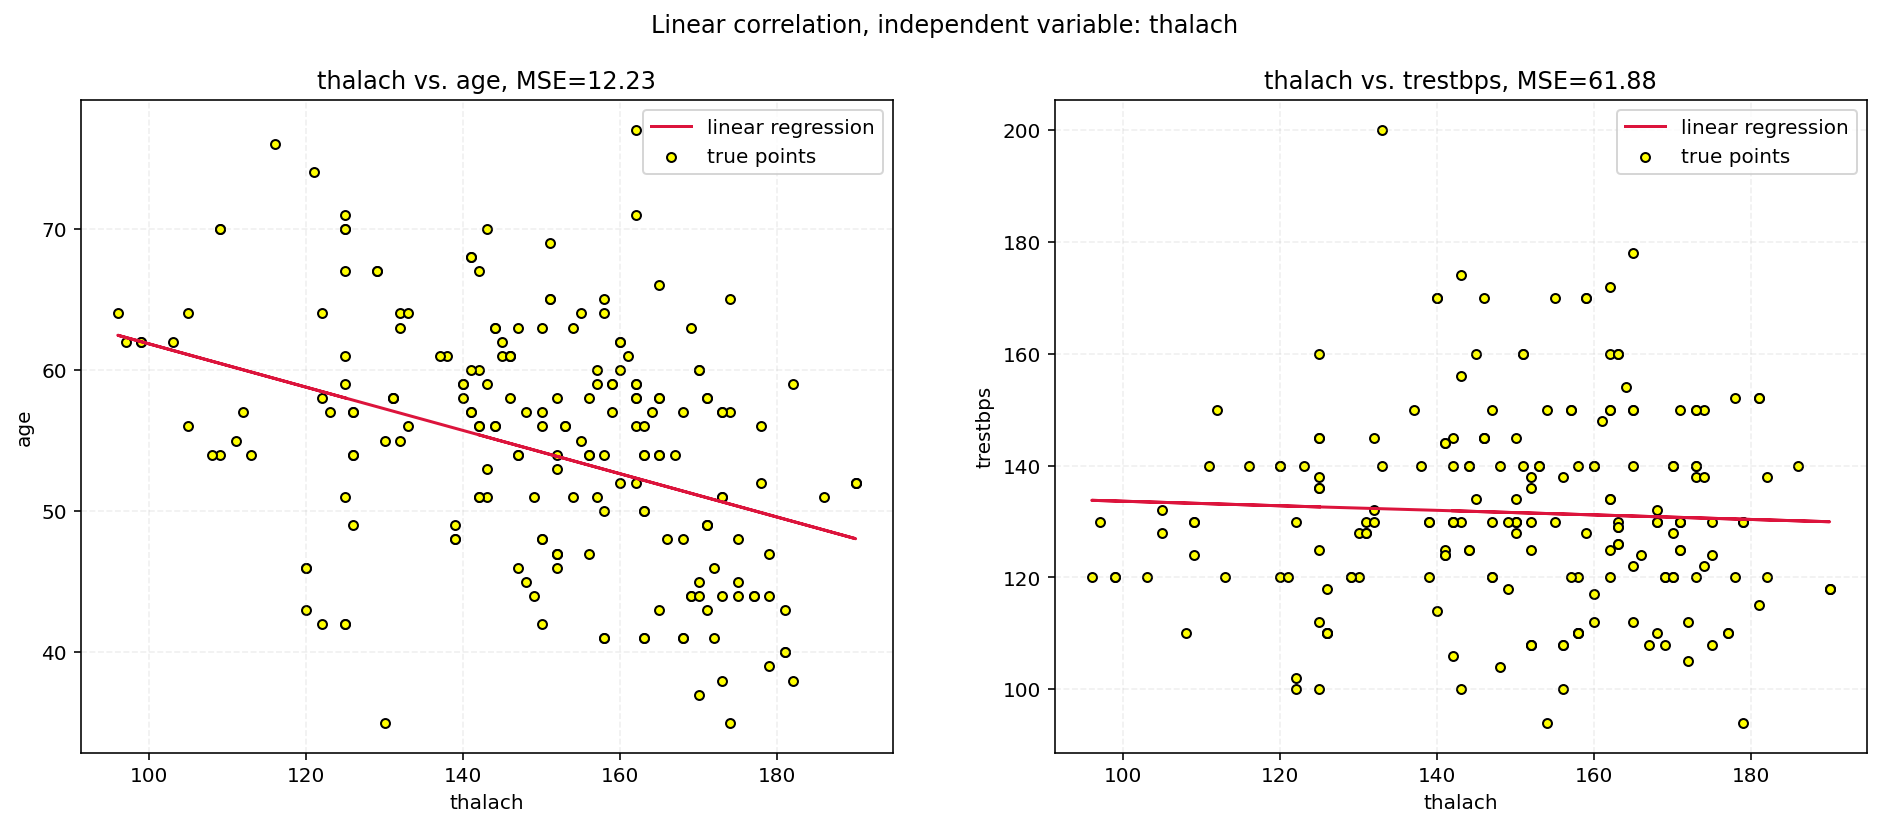

In [17]:
plot_linear_two(df, "thalach", ["age", "trestbps"])

In [18]:
def plot_kde(df, variables):
    for c in variables.keys():
        fig, ax = plt.subplots(figsize=(10,6))
        
        # splitting into two subsets
        target0, target1 = df[df["target"] == 0], df[df["target"] == 1]
        
        # plots
        sns.kdeplot(data=target0, x=c, ax=ax, color='blue', label="Heart disease")
        sns.kdeplot(data=target1, x=c, ax=ax, color='crimson', label="No heart disease")
        ax.set(title=f"{variables[c]}.")
        
        # mean lines
        kdeline0, kdeline1 = ax.lines[0], ax.lines[1]
        mean0, mean1 = target0[c].mean(), target1[c].mean()
        xs0, xs1 = kdeline0.get_xdata(), kdeline1.get_xdata()
        ys0, ys1 = kdeline0.get_ydata(), kdeline1.get_ydata()
        height0, height1 = np.interp(mean0, xs0, ys0), np.interp(mean1, xs1, ys1)
        ax.vlines(x=mean0, ymin=0, ymax=height0, ls="--", color="blue", label=f"Mean: {round(mean0)}")
        ax.vlines(x=mean1, ymin=0, ymax=height1, ls="--", color="crimson", label=f"Mean: {round(mean1)}")
        
        # remove yticks
        plt.gca().set_yticks([])
        
        
        # filling between
        ax.fill_between(x=xs0, y1=ys0, alpha=0.4)
        ax.fill_between(x=xs1, y1=ys1, alpha=0.4)
        
        # legend
        ax.legend()
        
#         fig.savefig(fname=f"visualizations/{c}.png",
#                     dpi=300,
#                     bbox_inches="tight",
#                     pad_inches=0.2,
#                     format='png'
#                     )

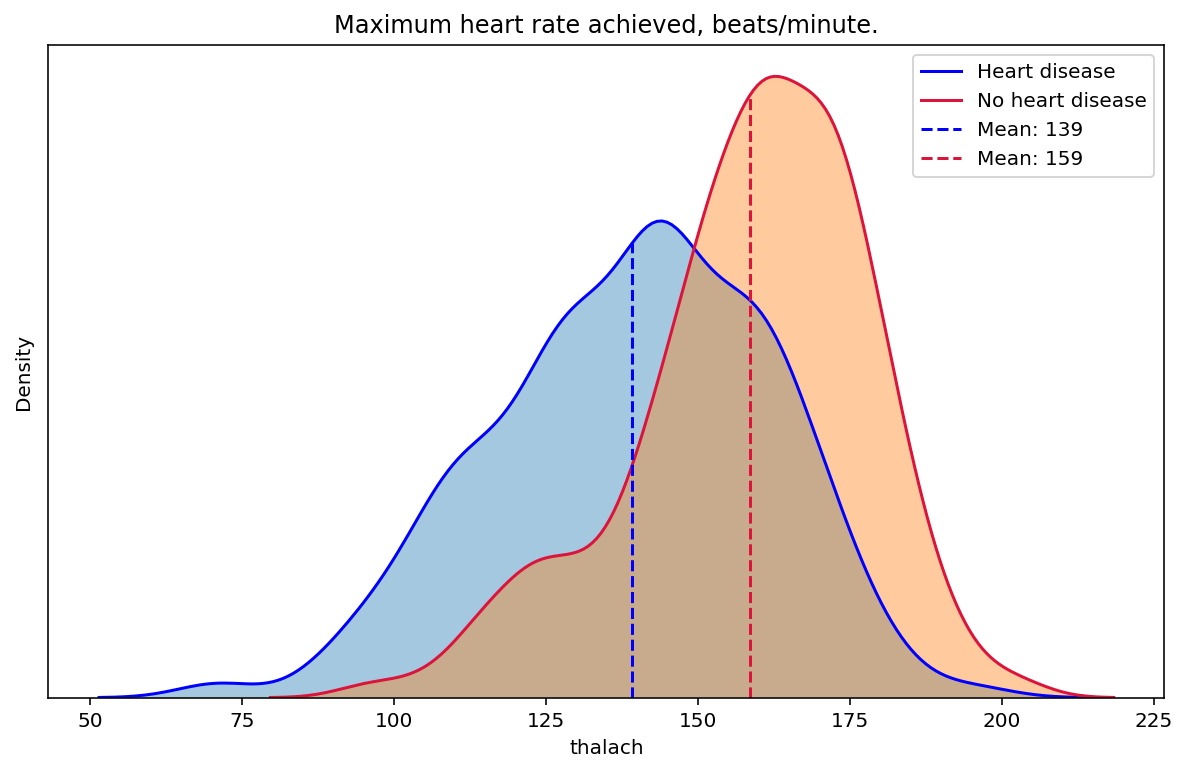

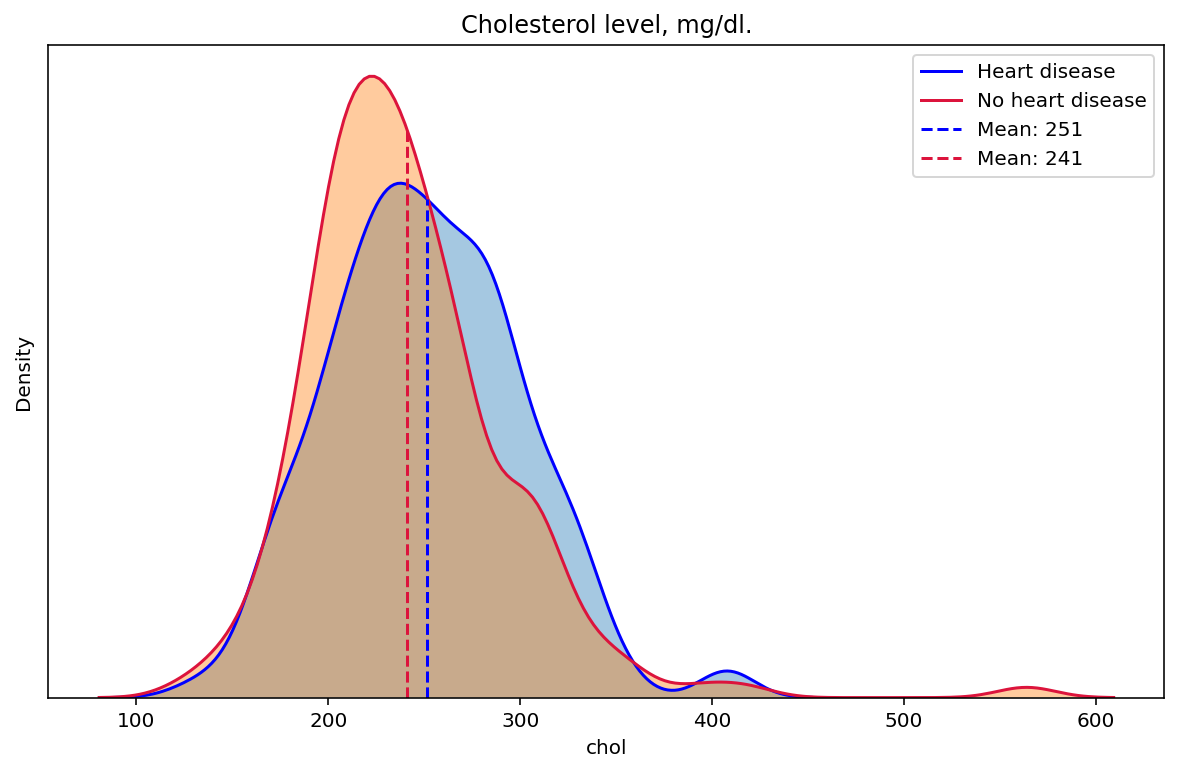

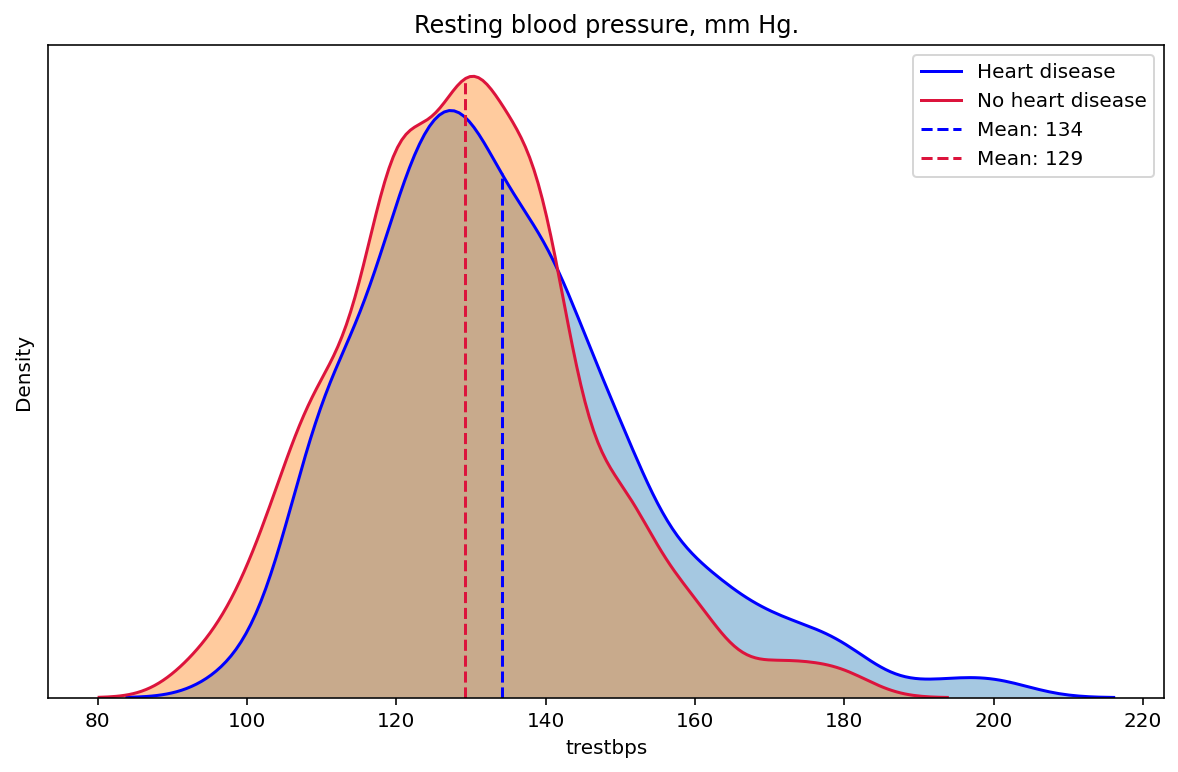

In [19]:
plot_kde(df, numeric_variables)

In [20]:
def plot_count(df, categorical_variables):
    for c in categorical_variables.keys():
        fig, ax = plt.subplots(figsize=(10,6))
        sns.countplot(data=df, x=c, hue="target", ax=ax)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        ax.set(title=f"{categorical_variables[c]['description']}")
        xticks = ax.get_xticks()
        ax.set_xticks(ticks=xticks, labels=categorical_variables[c]['values'])
#         fig.savefig(fname=f"visualizations/{c}.png",
#             dpi=300,
#             bbox_inches="tight",
#             pad_inches=0.2,
#             format='png'
#             )

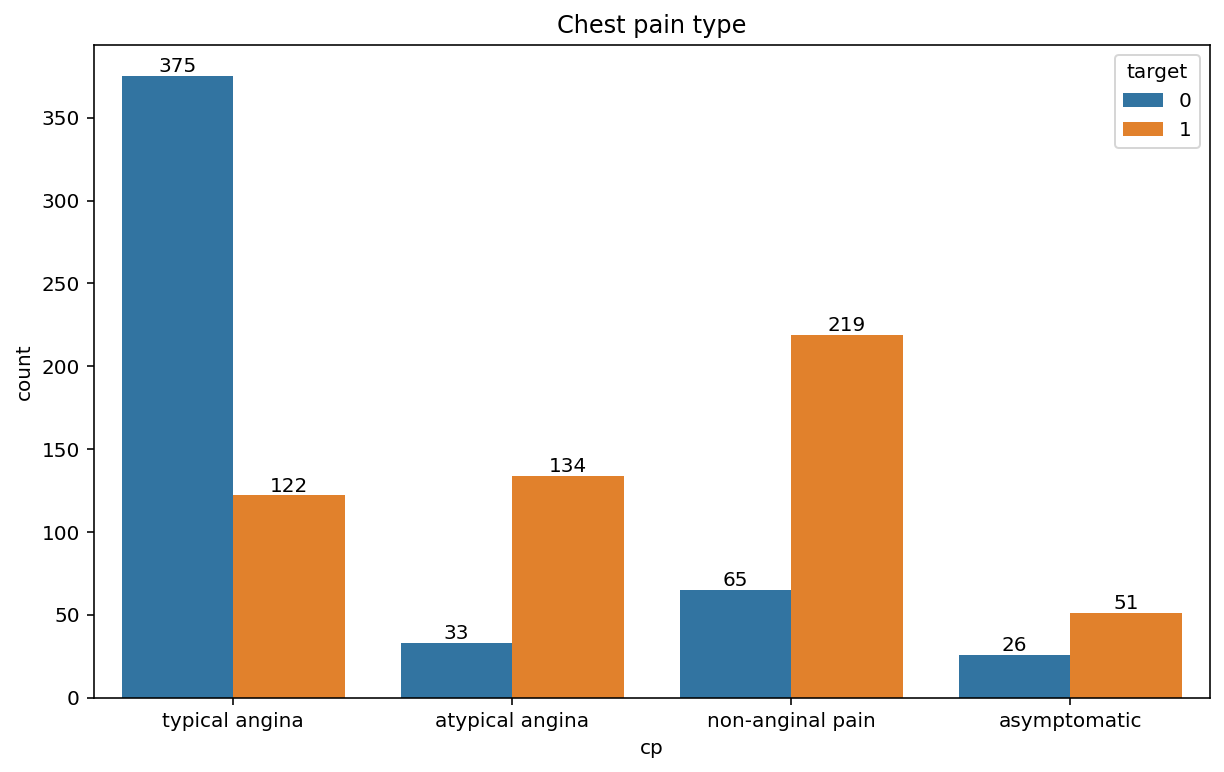

In [21]:
plot_count(df, categorical_variables)

### Modelling

In [22]:
subdf

,trestbps,chol,thalach,cp,target
0,125,212,168,0,0
1,140,203,155,0,0
2,145,174,125,0,0
3,148,203,161,0,0
4,138,294,106,0,0
...,...,...,...,...,...
1020,140,221,164,1,1
1021,125,258,141,0,0
1022,110,275,118,0,0
1023,110,254,159,0,1


In [23]:
np.random.seed(4)
subdf = df[["trestbps", "chol", "thalach", "cp", "target"]]
X = subdf.drop(["target"], axis=1)
y = subdf["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [25]:
cross_validate(RandomForestClassifier(n_estimators=100), X, y, cv=5)

{'fit_time': array([0.09544492, 0.09250307, 0.09275174, 0.09220386, 0.09194493]),
 'score_time': array([0.00673604, 0.00646615, 0.00648808, 0.00646591, 0.00643587]),
 'test_score': array([1.        , 1.        , 0.97073171, 1.        , 0.98536585])}

In [26]:
cross_validate(RandomForestClassifier(n_estimators=100), X, y, cv=5)["test_score"].mean()

0.9912195121951219

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       107
           1       0.69      0.79      0.73        98

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [28]:
rf.feature_importances_

array([0.17863739, 0.2680339 , 0.32379475, 0.22953396])

In [29]:
rf.feature_names_in_

array(['trestbps', 'chol', 'thalach', 'cp'], dtype=object)

In [30]:
np.random.seed(4)
subdf = df[["trestbps", "chol", "thalach", "cp", "target"]]
X = subdf.drop(["target"], axis=1)
y = subdf["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
cross_validate(rf, X, y, cv=5)["test_score"].mean()

0.9912195121951219

In [31]:
def plot_importances(rf, X, y):
    features = rf.feature_names_in_
    importances = rf.feature_importances_
    p_importances = permutation_importance(rf, X, y, n_repeats=10, random_state=4).importances_mean
    cv = cross_validate(rf, X, y, cv=5)["test_score"].mean() * 100
    
    fig, axs = plt.subplots(figsize=(15,6), nrows=1, ncols=2)
    fig.suptitle(f"Feature importances, 5-folded cv accuracy: {cv:.2f}%")
    axs[0].bar(x=features, height=importances, label="importances")
    axs[0].bar_label(axs[0].containers[0], fmt="%.2f")
    axs[0].set(title=f"Inner",
           xlabel="Features",
           ylabel="Importances")
    
    axs[1].bar(x=features, height=p_importances, label="importances")
    axs[1].bar_label(axs[1].containers[0], fmt="%.2f")
    axs[1].set(title=f"Permutation",
           xlabel="Features",
           ylabel="Importances")
#     fig.savefig(fname=f"visualizations/{len(features)}-feature-importances.png",
#         dpi=300,
#         bbox_inches="tight",
#         pad_inches=0.2,
#         format='png'
#         )

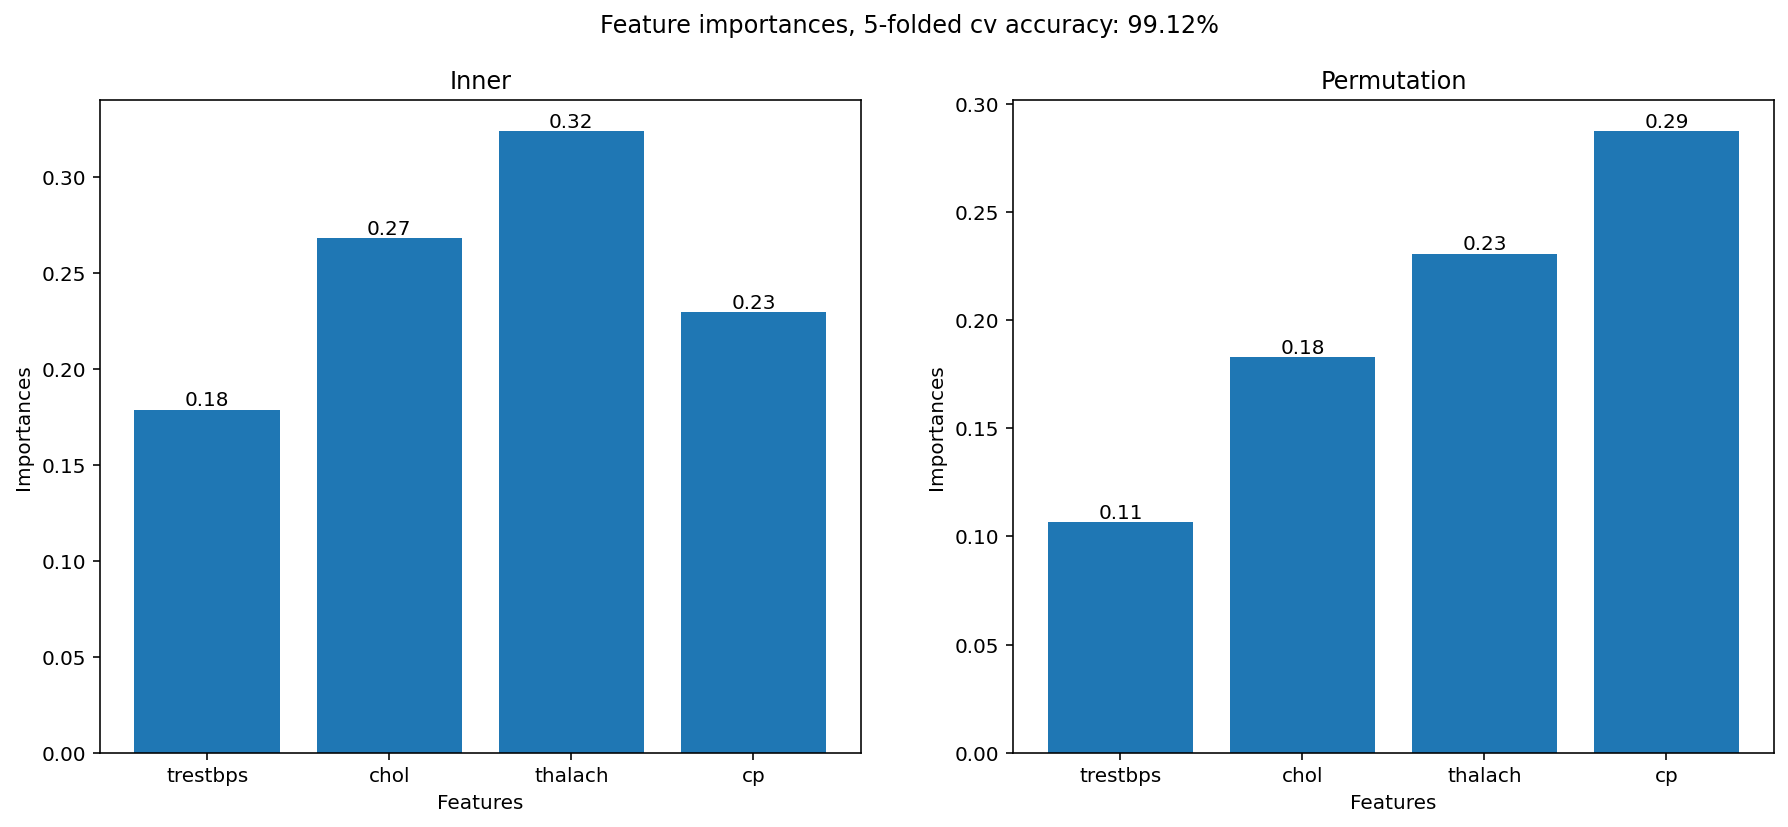

In [32]:
plot_importances(rf, X, y)